In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

In [2]:
filePath = "./Database/games-release-ALL.csv"

with open(filePath,"r",encoding="utf-8") as fileCsv:
    steam_df = pd.read_csv(fileCsv) 

In [3]:
steam_df

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,"4,529","19,807",227,227,96.39%
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,"168,191","61,752","1,616","1,616",95.75%
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,"15,543","12,643",213,213,95.54%
3,3,Pineapple on pizza,/app/2263010/,Mar 28 2023,"1,415","11,717",209,209,95.39%
4,4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,"6,132","14,152",324,324,95.09%
...,...,...,...,...,...,...,...,...,...
66422,66422,Space Empires V,/app/1690/,Oct 16 2006,137,290,120,120,67.34%
66423,66423,Iron Warriors: T-72 Tank Command,/app/1670/,Jul 26 2006,15,173,104,104,60.17%
66424,66424,Gumboy: Crazy Adventures,/app/2520/,Dec 19 2006,22,61,60,60,50.32%
66425,66425,Shattered Union,/app/3960/,Oct 25 2006,13,71,70,70,50.27%


In [4]:
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        66427 non-null  int64 
 1   game              66427 non-null  object
 2   link              66427 non-null  object
 3   release           66427 non-null  object
 4   peak_players      66427 non-null  object
 5   positive_reviews  66427 non-null  object
 6   negative_reviews  66427 non-null  object
 7   total_reviews     66427 non-null  object
 8   rating            66427 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [5]:
steam_df["peak_players"] = steam_df["peak_players"].str.replace(",","")
steam_df["positive_reviews"] = steam_df["positive_reviews"].str.replace(",","")
steam_df["negative_reviews"] = steam_df["negative_reviews"].str.replace(",","")
steam_df["rating"] = steam_df["rating"].str.replace("%","")

steam_df.head(2)

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,4529,19807,227,227,96.39
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,168191,61752,1616,"1,616",95.75


In [33]:
del steam_df["Unnamed: 0"]

In [6]:
steam_df[["peak_players","positive_reviews","negative_reviews"]] = steam_df[["peak_players","positive_reviews","negative_reviews"]].astype("int64")
steam_df["rating"] = steam_df["rating"].astype("Float64")
steam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66427 non-null  int64  
 1   game              66427 non-null  object 
 2   link              66427 non-null  object 
 3   release           66427 non-null  object 
 4   peak_players      66427 non-null  int64  
 5   positive_reviews  66427 non-null  int64  
 6   negative_reviews  66427 non-null  int64  
 7   total_reviews     66427 non-null  object 
 8   rating            66427 non-null  Float64
dtypes: Float64(1), int64(4), object(4)
memory usage: 4.6+ MB


In [7]:
steam_df["total_reviews"] = steam_df["positive_reviews"] + steam_df["negative_reviews"]
steam_df.describe().round(2)

,Unnamed: 0,peak_players,positive_reviews,negative_reviews,total_reviews,rating
count,66427.00,66427.00,66427.00,66427.00,66427.00,66427.0
mean,33213.00,963.28,1288.21,219.14,1507.35,65.36
std,19175.97,19957.71,29799.34,5480.99,34294.88,14.05
min,0.00,0.00,0.00,0.00,1.00,15.09
25%,16606.50,3.00,5.00,1.00,8.00,56.69
50%,33213.00,7.00,19.00,6.00,26.00,66.83
75%,49819.50,47.00,100.00,29.00,134.00,75.71
max,66426.00,3257248.00,6307931.00,927317.00,7117776.00,97.54


In [8]:
steam_df

,Unnamed: 0,game,link,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,/app/2231450/,Jan 26 2023,4529,19807,227,20034,96.39
1,1,Resident Evil 4,/app/2050650/,Mar 24 2023,168191,61752,1616,63368,95.75
2,2,The Murder of Sonic the Hedgehog,/app/2324650/,Mar 31 2023,15543,12643,213,12856,95.54
3,3,Pineapple on pizza,/app/2263010/,Mar 28 2023,1415,11717,209,11926,95.39
4,4,Hi-Fi RUSH,/app/1817230/,Jan 25 2023,6132,14152,324,14476,95.09
...,...,...,...,...,...,...,...,...,...
66422,66422,Space Empires V,/app/1690/,Oct 16 2006,137,290,120,410,67.34
66423,66423,Iron Warriors: T-72 Tank Command,/app/1670/,Jul 26 2006,15,173,104,277,60.17
66424,66424,Gumboy: Crazy Adventures,/app/2520/,Dec 19 2006,22,61,60,121,50.32
66425,66425,Shattered Union,/app/3960/,Oct 25 2006,13,71,70,141,50.27


In [9]:
del steam_df["link"]


In [10]:
listaData=list(steam_df["release"])
listasplit = [x.split(" ") for x in listaData]
print(listasplit[0:10])


[['Jan', '26', '2023'], ['Mar', '24', '2023'], ['Mar', '31', '2023'], ['Mar', '28', '2023'], ['Jan', '25', '2023'], ['Jan', '9', '2023'], ['Apr', '1', '2023'], ['Mar', '31', '2023'], ['Jan', '19', '2023'], ['Jan', '13', '2023']]


In [11]:
release_df = pd.DataFrame(listasplit,columns=["mes","dia","ano"])


release_df.head(5)

,mes,dia,ano
0,Jan,26,2023
1,Mar,24,2023
2,Mar,31,2023
3,Mar,28,2023
4,Jan,25,2023


In [12]:
a=release_df["dia"].unique()
a=sorted([int(x) for x in a])

b=release_df["mes"].unique()

c=release_df["ano"].unique()
c.sort()

print(f"{a}\n,{b}\n,{c}")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
,['Jan' 'Mar' 'Apr' 'Feb' 'Dec' 'Jun' 'Oct' 'Jul' 'Aug' 'Sep' 'Nov' 'May']
,['2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018' '2019' '2020' '2021' '2022' '2023']


In [13]:
release_df["date"] = release_df["ano"]+"-"+release_df["mes"]+"-"+release_df["dia"]
release_df["date"] = pd.to_datetime(release_df["date"])
release_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66427 entries, 0 to 66426
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mes     66427 non-null  object        
 1   dia     66427 non-null  object        
 2   ano     66427 non-null  object        
 3   date    66427 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 2.0+ MB


In [14]:
steam_df["release"] = pd.to_datetime(steam_df["release"])

In [15]:
steam_df.head(10)

,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
0,0,Pizza Tower,2023-01-26,4529,19807,227,20034,96.39
1,1,Resident Evil 4,2023-03-24,168191,61752,1616,63368,95.75
2,2,The Murder of Sonic the Hedgehog,2023-03-31,15543,12643,213,12856,95.54
3,3,Pineapple on pizza,2023-03-28,1415,11717,209,11926,95.39
4,4,Hi-Fi RUSH,2023-01-25,6132,14152,324,14476,95.09
5,5,东北之夏,2023-01-09,8672,8891,165,9056,95.08
6,6,Crab Champions,2023-04-01,8564,5129,81,5210,94.76
7,7,Papa's Freezeria Deluxe,2023-03-31,1227,1832,20,1852,93.84
8,8,A Space for the Unbound,2023-01-19,338,1917,27,1944,93.64
9,9,Handshakes,2023-01-13,195,1166,10,1176,93.3


In [16]:
steam_df.loc[steam_df["game"] =="Don't Starve Together"]


,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
56249,56249,Don't Starve Together,2016-04-21,68418,369233,15241,384474,95.08


In [17]:
steam_df.nlargest(10,"peak_players")

,Unnamed: 0,game,release,peak_players,positive_reviews,negative_reviews,total_reviews,rating
54389,54389,PUBG: BATTLEGROUNDS,2017-12-21,3257248,1235880,927317,2163197,57.04
65121,65121,Counter-Strike: Global Offensive,2012-08-21,1519457,6307931,809845,7117776,88.29
7840,7840,Lost Ark,2022-02-11,1325305,137424,53849,191273,71.29
64838,64838,Dota 2,2013-07-09,1295114,1618770,341275,1960045,82.17
27772,27772,Cyberpunk 2077,2020-12-10,1054388,472567,132706,605273,77.56
3427,3427,ELDEN RING,2022-02-24,953426,609072,54122,663194,91.1
19757,19757,New World,2021-09-28,913634,177063,76251,253314,69.43
23,23,Hogwarts Legacy,2023-02-10,879308,179479,14684,194163,91.35
15732,15732,Goose Goose Duck,2021-10-03,702845,39264,5549,44813,86.12
26933,26933,Apex Legends,2020-11-05,624473,522218,109307,631525,82.1


<Figure size 2000x1500 with 0 Axes>

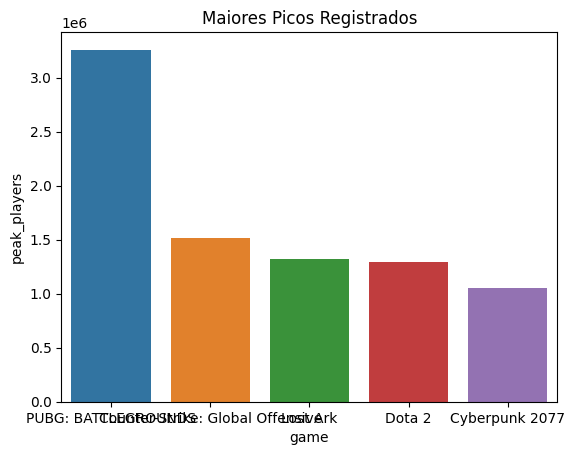

<Figure size 2000x1500 with 0 Axes>

In [18]:
sns.barplot(steam_df.nlargest(5,"peak_players"), y="peak_players", x="game")
plt.title("Maiores Picos Registrados")
plt.figure(figsize = (20,15))



# ax.set_title("Jogos Com Maiores Picos")



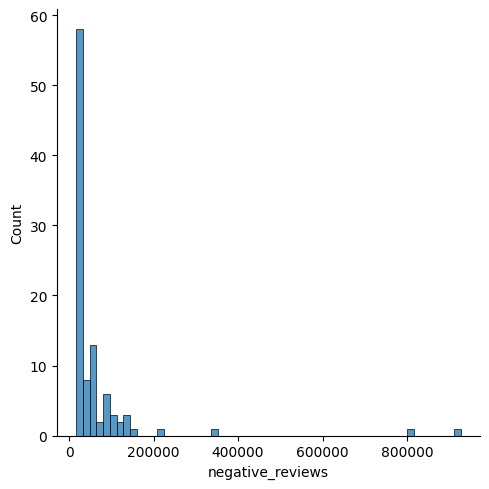

In [51]:
sns.displot(steam_df.nlargest(100,"negative_reviews"), x="negative_reviews")

In [45]:
steam_df.columns

Index(['Unnamed: 0', 'game', 'release', 'peak_players', 'positive_reviews',
       'negative_reviews', 'total_reviews', 'rating'],
      dtype='object')

In [47]:
steam_df.index

RangeIndex(start=0, stop=66427, step=1)